# SIGNAL PROCESSING TP2 - M2 AI
## To Do: FIR Delay effect

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

Sources:
- https://www.youtube.com/watch?app=desktop&v=GwgAFqK0QgI

---

## IMPORT

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
import IPython.display as ipd
from scipy.signal import freqz
import scipy.io.wavfile as wav

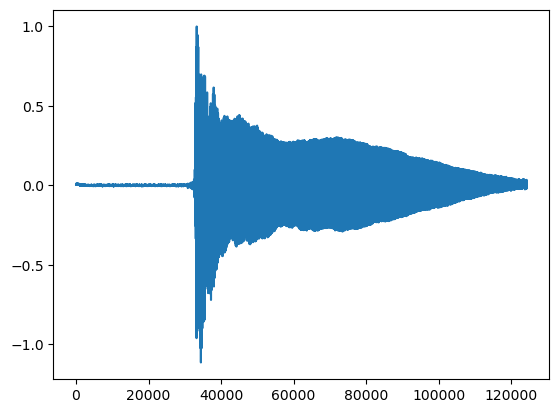

In [4]:
file_name = "string_a.wav"
sr, f = wav.read(file_name)
plt.plot(sig)
plt.show()

## Determine the impulse response of the filter

We define the Delay FIR filter by the following equation: 

$$
s[t] = e[t]+ \alpha e[t-D]
$$

 For discrete-time systems, this impulse signal is represented by the Kronecker delta function $\delta[t] $. 

To find the impulse response $ h[t] $ of our FIR filter, we can substitute an impulse signal $ \delta[t] $ as the input to the filter's difference equation. The FIR filter difference equation is generally represented as:

Therefore we have:
$$
h[t] = \delta[t]+ \alpha \delta[t-D]
$$


Therefore we have two main cases : $D=0$ and $D\neq 0$

If $D=0$ then we have necessarily $t=0$ and then: 
$$
h[t] = \delta[0]+ \alpha \delta[0] = 1+\alpha
$$

If $D\neq0$ then:
$$h[t] = 
\begin{cases} 
1 & \text{if } t = 0 \\
\alpha & \text{if } t = D \\
0 & \text{otherwise}
\end{cases}$$

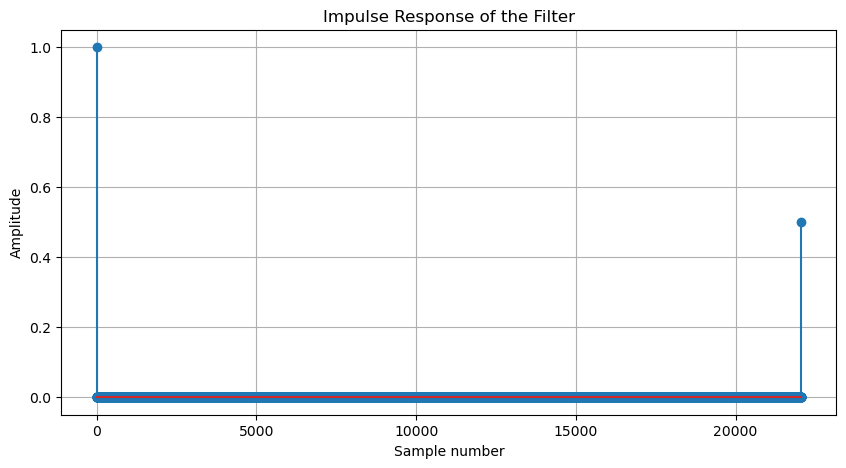

In [33]:
a = 0.5
D = sr

# Generate impulse response
h = np.zeros(D + 1)
h[0] = 1
h[D] = a

# Plotting
plt.figure(figsize=(10, 5))
plt.stem(h)
plt.title('Impulse Response of the Filter')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Provide the Frequency response of the filter

To determine the frequency response of a system, we compute the Fourier Transform of its zero padded impulse response.



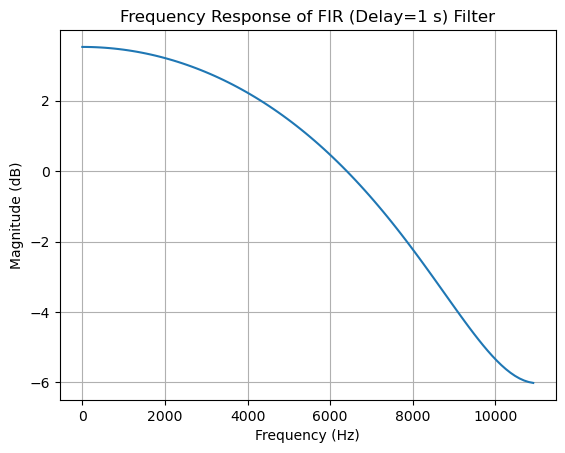

In [8]:
# Sample rate
fs = sr  

# Filter params
alpha = 0.5
D = 1

# Impulse response of the delay FIR filter
h =  np.concatenate([[1], np.zeros(D-1), [alpha]])

# Zero padding for a smoother frequency response
n_fft = len(h) * 100  # zero-padding chosen for smoothness in the plot
h_padded = np.pad(h, (0, n_fft - len(h)))

# Compute the FFT of the zero-padded impulse response
H = np.fft.fft(h_padded)

# Compute the frequency axis for plotting
freqs = np.fft.fftfreq(n_fft, 1/fs)

# Plot the magnitude of the frequency response
plt.plot(freqs[:n_fft//2], 20*np.log10(np.abs(H[:n_fft//2])))  # Plot in dB
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title(f'Frequency Response of FIR (Delay={D} s) Filter')
plt.grid(True)
plt.show()

We can compare our computation with the built in function in scipy 

scipy.signal.freqz

In [10]:
rad_frequencies,freq_response = freqz(h) 

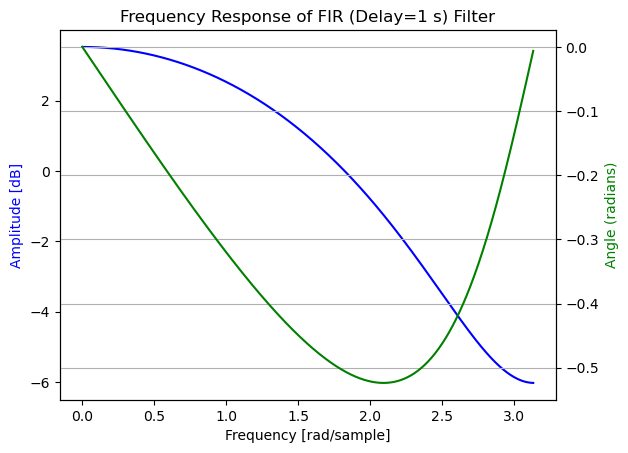

In [11]:
fig, ax1 = plt.subplots()
ax1.set_title(f'Frequency Response of FIR (Delay={D} s) Filter')

ax1.plot(rad_frequencies, 20 * np.log10(abs(freq_response)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(freq_response))
ax2.plot(rad_frequencies, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

## Implement the delay effect in the time domain

In [31]:
D = sr
alpha = 0.5
h =  np.concatenate([[1], np.zeros(D-1), [alpha]])

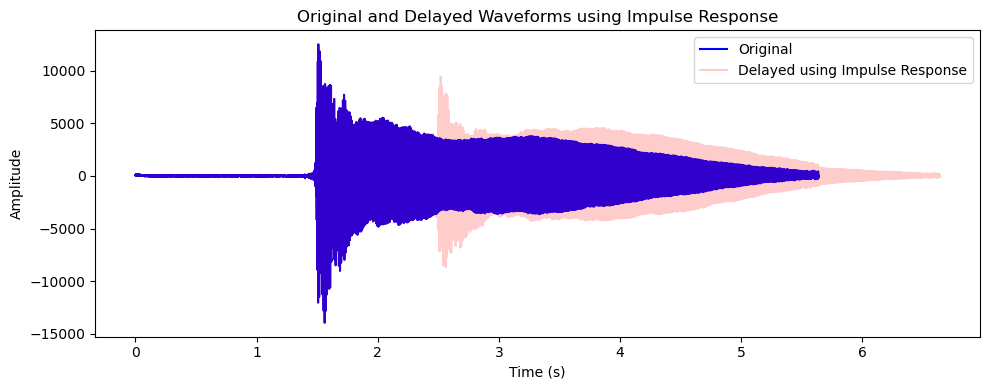

In [32]:
f_delayed = np.convolve(f, h, mode='full')

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(f) / sr, len(f)), f, label='Original', color='b')
plt.plot(np.linspace(0, len(f_delayed) / sr, len(f_delayed)), f_delayed, label='Delayed using Impulse Response', color='r', alpha=0.2)

plt.title('Original and Delayed Waveforms using Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

ipd.Audio(f_delayed, rate=sr)